<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/Masters-Project---Machine-Learning/blob/main/SM_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Data manipulations
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np

# Miscellaneous
import math
import time
from collections import OrderedDict
!pip install ordered_set
from ordered_set import OrderedSet
from joblib import dump, load

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Alloy formulae split
!pip install pymatgen
from pymatgen.core.composition import Composition

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

# Performance
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8218 sha256=292ebdc9fb2ab67dd436cb6741f0380d852a3f27d011a7496e24f9e7f9a8ded4
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built ordered-set
     |████████████████████████████████| 3.3MB 30.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 296kB 44.3MB/s 
     |████████████████████████████████| 28.5MB 106kB/s 
     |████████████████████████████████| 112kB 50.3MB/s 
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
     |████████████████████████████████| 256kB 42.0MB/s 
   

     |████████████████████████████████| 69.2MB 118kB/s 


In [ ]:
!pip install pymatgen

# Preliminary data processing

## Read data

In [ ]:
as_read_elemental_properties_data_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Elemental Properties Data.xlsx', index_col=0)

as_read_SM_data_df = pd.read_csv('/content/drive/MyDrive/DDP/Stored data/SM/SM_data_df.csv', index_col=0)

as_read_mixing_enthalpy_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Enthalpy of mixing.xlsx', index_col=0)

display(as_read_elemental_properties_data_df)
print(as_read_elemental_properties_data_df.shape)

display(as_read_SM_data_df)

display(as_read_mixing_enthalpy_df)

,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,P,VEC,sVEC,pVEC,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
Element,,,,,,,,,,,,,,,,,,,,,,,
Ag,1.30400,7.576,21.45411,1234.9300,107.87000,47,0.1445,0.145,11,5,11,1,0,10,1.93,1.83,25.350,429.000,4.64,10.500,11.300,18.005,2435.15
Al,0.43280,5.986,18.82883,933.4700,26.98154,13,0.1432,0.121,13,3,3,2,1,0,1.61,1.37,24.200,237.000,4.19,2.700,10.790,16.472,2792.15
Au,2.30900,9.226,20.52132,1337.3300,196.97000,79,0.1442,0.136,11,6,11,1,0,10,2.54,2.33,25.418,317.000,5.32,19.300,12.550,18.145,3129.15
B,0.28000,8.298,25.15521,2349.1500,10.81000,5,0.0820,0.084,13,2,3,2,1,0,2.04,1.77,11.087,27.000,4.75,2.340,50.200,86.991,4200.15
Ba,0.14500,5.212,10.00363,1000.1500,137.33000,56,0.2176,0.215,2,6,2,2,0,0,0.89,1.17,28.070,18.400,2.35,3.620,7.750,63.643,2170.15
Be,-0.50000,9.322,18.21112,1560.1500,9.01220,4,0.1128,0.096,2,2,2,2,0,0,1.57,2.01,16.443,200.000,5.08,1.850,12.200,15.788,2742.15
C,1.26200,11.260,24.38306,3823.1500,12.01070,6,0.0773,0.076,14,2,4,2,2,0,2.55,2.51,8.517,129.000,5.00,2.200,117.000,45.803,4300.15
Ca,0.02500,6.113,11.87128,1115.1500,40.07800,20,0.1976,0.176,2,4,2,2,0,0,1.00,1.32,25.929,200.000,2.71,1.540,8.540,41.692,1757.15
Ce,0.57000,5.539,10.88252,1068.1500,140.11600,58,0.1825,0.204,3,6,3,2,0,1,1.12,1.31,26.940,11.400,2.80,6.770,5.460,26.296,3716.15


(55, 23)


,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Shear modulus (GPa)
0,Ca20Zn20Sr20Yb20Li11Mg9,-0.07662,1.465814,0.351122,4.582645,6.77246,0.153277,1.423277,0.210157,20.281848,0.069979,19.622814,0.967506,924.0154,0.001181,226.979143,0.245644,76.176450,0.031041,54.373559,0.713784,33.01,0.068954,21.285908,0.644832,0.175578,5.837985,0.027582,0.157091,0.16277,6.368541,0.029466,0.181030,4.09,0.438333,3.992731,0.976218,4.29,0.258333,1.202456,0.280293,4.09,0.438333,3.992731,0.976218,1.89,0.462103,0.00,0.000000,2.20,0.537897,1.1977,0.871416,0.261013,0.217928,1.4802,0.699262,0.300832,0.203237,25.86461,0.038689,0.675795,0.026128,100.597,0.015996,63.589728,0.632124,3.1144,0.334483,0.673837,0.216362,3.85934,0.520341,2.644902,0.685325,7.50026,0.147658,1.665397,0.222045,54.21483,0.025738,48.407413,0.892881,1512.67,0.000674,204.142621,0.134955,-24.3040,1.747066,0.001126,-0.027362,-42.460684,-0.047802,0.024365,0.019802,6.3
1,Sr60Li5Mg15Zn20,-0.11790,10.911034,0.320653,2.719701,6.71230,0.155537,1.509030,0.224816,16.248016,0.076169,13.911044,0.856169,929.7830,0.001133,176.851130,0.190207,69.640750,0.023283,26.503803,0.380579,30.75,0.051623,11.085463,0.360503,0.188630,5.487874,0.033104,0.175497,0.16895,6.170722,0.032389,0.191708,3.95,0.441667,4.030819,1.020460,4.35,0.245000,0.909670,0.209120,3.95,0.441667,4.030819,1.020460,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1455,0.918315,0.281540,0.245779,1.4670,0.710490,0.323003,0.220179,25.89135,0.038647,0.644569,0.024895,72.015,0.020273,47.558367,0.660395,3.2200,0.321016,0.624500,0.193944,3.29970,0.435124,1.989487,0.602930,7.93750,0.133023,1.236345,0.155760,70.70785,0.020632,57.375514,0.811445,1514.35,0.000673,195.371339,0.129013,-24.5600,1.062738,0.001405,-0.034509,-26.100835,-0.036674,0.030634,0.022357,7.0
2,Sr60Mg18Zn22,-0.17280,10.721795,0.282423,1.634390,6.85996,0.152316,1.529115,0.222904,13.276383,0.078617,2.901851,0.218572,948.6466,0.001084,143.919894,0.151711,71.330500,0.017619,23.770783,0.333249,31.56,0.038123,9.710118,0.307672,0.188628,5.489462,0.033183,0.175918,0.16922,6.156798,0.032135,0.189900,4.20,0.408333,4.142463,0.986301,4.42,0.235000,0.776917,0.175773,4.20,0.408333,4.142463,0.986301,2.00,0.476190,0.00,0.000000,2.20,0.523810,1.1688,0.902317,0.288539,0.246867,1.4934,0.699499,0.331467,0.221955,25.90222,0.038630,0.631308,0.024373,74.780,0.020048,49.964043,0.668147,3.2608,0.317734,0.645563,0.197977,3.46800,0.361533,1.978690,0.570557,8.20256,0.122438,0.527182,0.064270,76.46654,0.018936,60.837409,0.795608,1498.09,0.000681,200.791375,0.134032,-26.8992,0.948267,0.001412,-0.037977,-25.507629,-0.036012,0.030643,0.022423,7.7
3,Sr60Mg20Zn15Cu5,-0.07700,10.828915,0.397590,5.163513,6.74160,0.153952,1.387280,0.205779,13.334195,0.078514,3.066262,0.229955,986.5105,0.001041,151.904698,0.153982,70.417300,0.018158,24.677834,0.350451,31.15,0.039180,10.095915,0.324106,0.188455,5.503828,0.033666,0.178644,0.17010,6.103659,0.031000,0.182245,3.95,0.417045,3.904805,0.988558,4.40,0.236667,0.800000,0.181818,3.95,0.417045,3.904805,0.988558,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1745,0.901476,0.306830,0.261243,1.4765,0.704188,0.309278,0.209467,25.84430,0.038723,0.710693,0.027499,89.830,0.019697,87.200201,0.970725,3.2680,0.317558,0.669220,0.204780,3.45100,0.368804,2.130469,0.617348,8.52160,0.118943,1.143693,0.134

,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,H,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,Li,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,Be,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,B,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,C,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,Pb,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,Bi,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,Th,4,0


## Data types

In [ ]:
# Confirm data types
as_read_SM_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 96 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Alloy formula        278 non-null    object 
 1   Eea (ev)_1           275 non-null    float64
 2   Eea (ev)_2           275 non-null    float64
 3   Eea (ev)_D           275 non-null    float64
 4   Eea (ev)_d           275 non-null    float64
 5   I1 (ev)_1            275 non-null    float64
 6   I1 (ev)_2            275 non-null    float64
 7   I1 (ev)_D            275 non-null    float64
 8   I1 (ev)_d            275 non-null    float64
 9   I2 (ev)_1            275 non-null    float64
 10  I2 (ev)_2            275 non-null    float64
 11  I2 (ev)_D            275 non-null    float64
 12  I2 (ev)_d            275 non-null    float64
 13  Tm (K)_1             275 non-null    float64
 14  Tm (K)_2             275 non-null    float64
 15  Tm (K)_D             275 non-null    flo

## Missing values

In [ ]:
# Rows with missing values
as_read_SM_data_df.isnull().any(axis=1).value_counts()

False    275
True       3
dtype: int64

In [ ]:
as_read_SM_data_df.loc[as_read_SM_data_df.isnull().any(axis=1), :]

,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Shear modulus (GPa)
86,Zr70Al7(Ni1/3Cu2/3)23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.4
96,Zr68Al8(Ni1/3Cu2/3)24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.8
101,Zr66Al9(Ni1/3Cu2/3)25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8


Observations:
1. 3 rows has missing null values

In [ ]:
# Columns with missing values
as_read_SM_data_df.isnull().any(axis=0).value_counts()

True     94
False     2
dtype: int64

Observations:
1. 94 columns have missing values

In [ ]:
# Drop null rows
imputed_SM_data_df = as_read_SM_data_df.drop(index=as_read_SM_data_df[as_read_SM_data_df.isnull().any(axis=1)].index, inplace=False)

# Confirm
imputed_SM_data_df.isnull().any().value_counts()

False    96
dtype: int64

Observations:
1. No more null values left.

# Exploratory data analysis

## Distribution plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

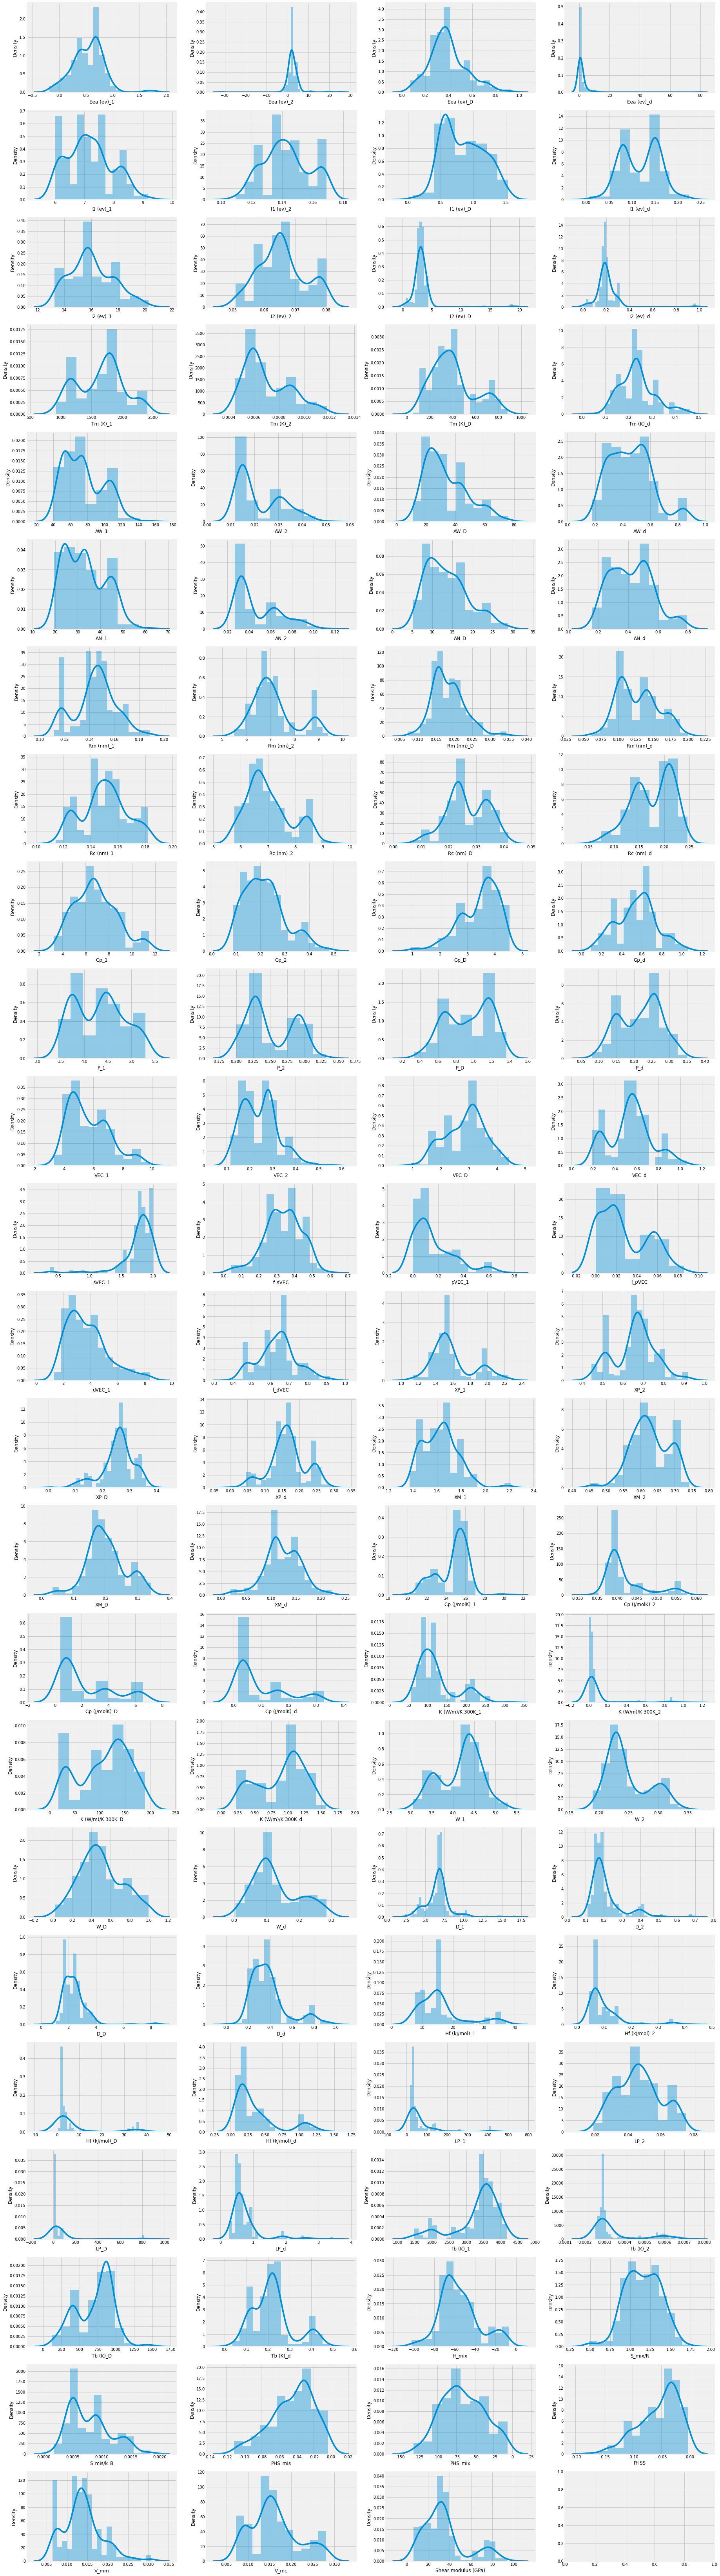

In [ ]:
# Create figure and axes array
n_cols = 4
n_rows = math.ceil(len(imputed_SM_data_df.select_dtypes(exclude='object').columns) / n_cols)
figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# Initialize axes array row and column indices
i = 0 # Row index of axes array of subplots
j = 0 # Column index of axes array of subplots

# Loop over columns to plot
for column_name in imputed_SM_data_df.select_dtypes(exclude='object').columns: # 'Id' and 'idhogar' are of 'object' data type
    # Plot in the subplot
    sns.distplot(imputed_SM_data_df[column_name], ax=axes_array[i][j])

    # Reset column index of axes array of subplots
    j += 1
    if j == n_cols: 
        j = 0
        i += 1

## Correlation heatmap

In [ ]:
# Get correlation matrix
SM_correlation_matrix_df = imputed_SM_data_df.corr()

# Plot
plt.figure(figsize=(80,85))
sns.heatmap(abs(SM_correlation_matrix_df), annot=True)

# Feature engineering

Useful resources:
1. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

## Set of all features

In [ ]:
# Initialize dictionary to store feature subsets
selected_feature_subsets_dict = OrderedDict()

# Set of all features
selected_feature_subsets_dict['All'] = OrderedSet(imputed_SM_data_df.columns[1:-1])

# Display
print(selected_feature_subsets_dict['All'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['All'])}")

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mi

# ML modeling

## Data preprocessing

### Separate X and y data

In [ ]:
# Input data
X_data_df = imputed_SM_data_df.iloc[:, 1:-1]

# Display
display(X_data_df)

# Target data
y_data_series = imputed_SM_data_df['Shear modulus (GPa)']

# Display
display(y_data_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
0,-0.07662,1.465814,0.351122,4.582645,6.77246,0.153277,1.423277,0.210157,20.281848,0.069979,19.622814,0.967506,924.0154,0.001181,226.979143,0.245644,76.176450,0.031041,54.373559,0.713784,33.01,0.068954,21.285908,0.644832,0.175578,5.837985,0.027582,0.157091,0.16277,6.368541,0.029466,0.181030,4.09,0.438333,3.992731,0.976218,4.29,0.258333,1.202456,0.280293,4.09,0.438333,3.992731,0.976218,1.89,0.462103,0.00,0.000000,2.20,0.537897,1.1977,0.871416,0.261013,0.217928,1.4802,0.699262,0.300832,0.203237,25.86461,0.038689,0.675795,0.026128,100.597,0.015996,63.589728,0.632124,3.1144,0.334483,0.673837,0.216362,3.85934,0.520341,2.644902,0.685325,7.50026,0.147658,1.665397,0.222045,54.21483,0.025738,48.407413,0.892881,1512.67,0.000674,204.142621,0.134955,-24.3040,1.747066,0.001126,-0.027362,-42.460684,-0.047802,0.024365,0.019802
1,-0.11790,10.911034,0.320653,2.719701,6.71230,0.155537,1.509030,0.224816,16.248016,0.076169,13.911044,0.856169,929.7830,0.001133,176.851130,0.190207,69.640750,0.023283,26.503803,0.380579,30.75,0.051623,11.085463,0.360503,0.188630,5.487874,0.033104,0.175497,0.16895,6.170722,0.032389,0.191708,3.95,0.441667,4.030819,1.020460,4.35,0.245000,0.909670,0.209120,3.95,0.441667,4.030819,1.020460,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1455,0.918315,0.281540,0.245779,1.4670,0.710490,0.323003,0.220179,25.89135,0.038647,0.644569,0.024895,72.015,0.020273,47.558367,0.660395,3.2200,0.321016,0.624500,0.193944,3.29970,0.435124,1.989487,0.602930,7.93750,0.133023,1.236345,0.155760,70.70785,0.020632,57.375514,0.811445,1514.35,0.000673,195.371339,0.129013,-24.5600,1.062738,0.001405,-0.034509,-26.100835,-0.036674,0.030634,0.022357
2,-0.17280,10.721795,0.282423,1.634390,6.85996,0.152316,1.529115,0.222904,13.276383,0.078617,2.901851,0.218572,948.6466,0.001084,143.919894,0.151711,71.330500,0.017619,23.770783,0.333249,31.56,0.038123,9.710118,0.307672,0.188628,5.489462,0.033183,0.175918,0.16922,6.156798,0.032135,0.189900,4.20,0.408333,4.142463,0.986301,4.42,0.235000,0.776917,0.175773,4.20,0.408333,4.142463,0.986301,2.00,0.476190,0.00,0.000000,2.20,0.523810,1.1688,0.902317,0.288539,0.246867,1.4934,0.699499,0.331467,0.221955,25.90222,0.038630,0.631308,0.024373,74.780,0.020048,49.964043,0.668147,3.2608,0.317734,0.645563,0.197977,3.46800,0.361533,1.978690,0.570557,8.20256,0.122438,0.527182,0.064270,76.46654,0.018936,60.837409,0.795608,1498.09,0.000681,200.791375,0.134032,-26.8992,0.948267,0.001412,-0.037977,-25.507629,-0.036012,0.030643,0.022423
3,-0.07700,10.828915,0.397590,5.163513,6.74160,0.153952,1.387280,0.205779,13.334195,0.078514,3.066262,0.229955,986.5105,0.001041,151.904698,0.153982,70.417300,0.018158,24.677834,0.350451,31.15,0.039180,10.095915,0.324106,0.188455,5.503828,0.033666,0.178644,0.17010,6.103659,0.031000,0.182245,3.95,0.417045,3.904805,0.988558,4.40,0.236667,0.800000,0.181818,3.95,0.417045,3.904805,0.988558,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1745,0.901476,0.306830,0.261243,1.4765,0.704188,0.309278,0.209467,25.84430,0.038723,0.710693,0.027499,89.830,0.019697,87.200201,0.970725,3.2680,0.317558,0.669220,0.204780,3.45100,0.368804,2.130469,0.617348,8.52160,0.118943,1.143693,0.134211,78.97705,0.020996,63.942629,0.809636,1584.50,0.000654,339.889876,0.214509,-22.2600,1.062738,0.001456,-0.032409,

0       6.3
1       7.0
2       7.7
3       7.8
4       7.9
       ... 
273    82.5
274    84.1
275    88.2
276    91.5
277    93.8
Name: Shear modulus (GPa), Length: 275, dtype: float64

### Train test split

In [ ]:
# Train test split
X_train_df, X_test_df, y_train_series, y_test_series = train_test_split(X_data_df, y_data_series, test_size=0.15, random_state=7)

# Display
display(X_train_df)
display(X_test_df)
display(y_train_series)
display(y_test_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
211,0.486020,1.292831,0.526214,1.082700,7.236800,0.140670,1.021028,0.141088,16.056589,0.064430,2.964698,0.184641,1767.9250,0.000607,407.897513,0.230721,65.063224,0.029896,31.030226,0.476924,29.050,0.066436,13.414451,0.461771,0.143020,7.123540,0.018841,0.131734,0.146200,7.188904,0.030590,0.209235,6.250,0.231329,3.819359,0.611097,4.100,0.270833,1.090871,0.266066,5.250,0.256970,3.176082,0.604968,1.850,0.352381,0.10,0.019048,3.30,0.628571,1.53750,0.664896,0.236218,0.153637,1.64300,0.619216,0.221181,0.134620,23.839450,0.042944,3.150681,0.132162,134.2700,0.024675,137.072649,1.020873,4.4010,0.229726,0.472778,0.107425,6.04150,0.222782,2.441535,0.404127,15.06350,0.068367,2.435127,0.161657,30.375000,0.048110,16.707027,0.550026,3775.500,0.000282,913.919432,0.242066,-78.68000,1.376227,0.000792,-0.062290,-108.281509,-0.085725,0.012881,0.014766
102,0.717192,1.614672,0.267973,0.373642,6.541400,0.154435,0.698858,0.106836,14.906720,0.069653,2.928179,0.196434,1633.4800,0.000671,420.091260,0.257176,99.787625,0.016671,59.852033,0.599794,42.250,0.036185,23.396314,0.553759,0.147265,6.844379,0.012586,0.085462,0.157700,6.615823,0.031621,0.200516,6.850,0.212286,4.186586,0.611180,4.700,0.230000,1.228821,0.261451,4.350,0.276389,2.351064,0.540474,2.000,0.459770,0.25,0.057471,2.10,0.482759,1.47800,0.694444,0.246487,0.166771,1.52800,0.659305,0.134893,0.088280,25.628000,0.039105,1.200265,0.046834,89.3750,0.033472,90.799498,1.015938,3.7315,0.279579,0.744831,0.199606,7.15300,0.181091,2.734690,0.382314,15.20650,0.068152,2.562683,0.168525,39.776850,0.034125,19.528303,0.490946,2929.650,0.000364,824.442812,0.281413,-76.40000,1.319545,0.000333,-0.025456,-100.813273,-0.033591,0.013664,0.018391
95,0.409992,2.661955,0.135664,0.330895,6.452600,0.156648,0.718278,0.111316,14.671793,0.071013,3.037829,0.207052,1586.2668,0.000681,367.059437,0.231398,96.256980,0.016691,57.062386,0.592813,40.800,0.036291,22.148589,0.542858,0.158644,6.434690,0.021880,0.137917,0.160280,6.528166,0.032847,0.204935,6.600,0.227350,4.270831,0.647096,4.680,0.230000,1.190630,0.254408,4.200,0.288889,2.400000,0.571429,2.000,0.476190,0.24,0.057143,1.96,0.466667,1.45280,0.709708,0.263765,0.181557,1.45400,0.694835,0.158190,0.108796,26.199200,0.038320,1.641738,0.062664,85.4680,0.039815,91.151332,1.066497,3.5880,0.291109,0.763764,0.212866,6.57920,0.195896,2.788403,0.423821,15.27160,0.070230,3.962176,0.259447,43.710880,0.032595,22.095416,0.505490,3293.110,0.000307,312.757475,0.094973,-69.01760,1.354078,0.000868,-0.059890,-93.455182,-0.081095,0.017660,0.019384
183,0.321894,1.335033,0.546775,1.698615,7.521680,0.135591,1.104211,0.146804,15.563083,0.066094,2.700148,0.173497,1923.7844,0.000541,381.932642,0.198532,65.476048,0.036074,33.932860,0.518248,29.000,0.081166,14.843180,0.511834,0.140712,7.265486,0.020338,0.144533,0.146560,7.245814,0.032688,0.223033,4.760,0.276909,2.760869,0.580015,4.080,0.282000,1.230285,0.301540,4.760,0.276909,2.760869,0.580015,1.800,0.378151,0.00,0.000000,2.96,0.621849,1.51760,0.670642,0.208447,0.137353,1.68280,0.603724,0.217523,0.129262,23.027920,0.044873,3.714523,0.161305,117.7280,0.025132,126.605038,1.075403,4.4112,0.229028,0.454588,0.103053,5.96400,0.236242,2.474153,0.414848,15.82200,0.066097,3.729211,0.235698,30.161920,0.046818,16.271266,0.539464,3897

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
246,0.444026,4.421066,0.408640,0.920307,8.301782,0.122843,1.287330,0.155067,17.977860,0.057308,3.447145,0.191744,2294.299750,0.000473,745.711382,0.325028,53.216484,0.030988,26.867953,0.504880,24.359250,0.065064,11.528321,0.473263,0.116712,8.915193,0.020521,0.175823,0.123842,8.527346,0.025229,0.203723,8.946750,0.120583,2.610635,0.291797,3.735000,0.294875,0.969420,0.259550,6.846750,0.162753,1.838957,0.268588,1.860000,0.271662,0.360000,0.052580,4.626750,0.675759,1.995588,0.509258,0.266466,0.133528,1.807758,0.564995,0.298269,0.164994,21.630188,0.054737,6.420036,0.296809,93.197900,0.012777,29.724775,0.318943,4.649138,0.215856,0.246689,0.053061,7.086507,0.189102,2.622431,0.370060,34.211308,0.053100,36.158426,1.056914,22.861813,0.065893,20.442715,0.894186,3628.938000,0.000284,686.425841,0.189153,-63.450215,1.258425,0.001410,-0.089483,-79.847352,-0.112608,0.007240,0.008888
227,0.129600,4.266096,0.483661,3.731955,7.448500,0.137535,1.210899,0.162569,15.776080,0.065200,2.693120,0.170709,1738.603500,0.000611,367.019421,0.211100,47.108559,0.044409,30.766962,0.653108,21.175000,0.098915,13.460846,0.635695,0.138860,7.334681,0.018136,0.130603,0.140150,7.562783,0.031615,0.225582,4.875000,0.289510,3.479853,0.713816,3.600000,0.314583,1.135782,0.315495,3.875000,0.315152,2.204399,0.568877,1.925000,0.496774,0.100000,0.025806,1.850000,0.477419,1.529750,0.659520,0.146210,0.095578,1.639000,0.623614,0.252169,0.153855,22.632825,0.045755,3.828002,0.169135,121.020000,0.026696,119.598663,0.988255,4.398500,0.229628,0.453120,0.103017,4.432550,0.298978,2.182343,0.492345,14.272750,0.071766,2.155912,0.151051,34.023850,0.040972,17.054441,0.501250,3484.525000,0.000300,769.035262,0.220700,-64.580000,1.487315,0.000778,-0.050253,-96.050779,-0.074742,0.011779,0.013243
265,0.413730,4.571379,0.390494,0.943839,8.140380,0.125445,1.292848,0.158819,17.733990,0.058092,3.396854,0.191545,2239.360000,0.000479,692.697283,0.309328,52.897301,0.030099,27.518949,0.520234,24.220000,0.063347,11.576338,0.477966,0.117698,8.823121,0.020411,0.173415,0.125660,8.379927,0.024883,0.198019,8.600000,0.127234,2.660827,0.309398,3.750000,0.291333,0.931397,0.248372,6.700000,0.165833,1.774824,0.264899,1.810000,0.270149,0.320000,0.047761,4.570000,0.682090,1.937100,0.526298,0.279679,0.144380,1.771500,0.576413,0.291851,0.164748,21.895230,0.053314,6.151973,0.280973,88.586000,0.013829,28.545287,0.322232,4.608800,0.218364,0.312449,0.067794,6.962800,0.185985,2.400092,0.344702,31.470000,0.055519,34.399371,1.093085,21.928430,0.070097,20.940435,0.954945,3498.090000,0.000294,635.074875,0.181549,-59.245600,1.265743,0.001372,-0.081281,-74.989692,-0.102881,0.007418,0.009236
208,0.533560,2.452279,0.181111,0.339439,8.697560,0.116083,0.908093,0.104408,18.947028,0.053024,1.213403,0.064042,1523.206000,0.001069,602.958316,0.395848,83.238752,0.015336,31.785369,0.381858,36.600000,0.033400,12.955308,0.353970,0.129056,7.830621,0.012485,0.096742,0.131480,7.685597,0.012494,0.095023,10.680000,0.097333,2.275434,0.213056,4.440000,0.234667,0.803990,0.181079,8.680000,0.124000,1.974234,0.227446,0.720000,0.082949,0.600000,0.069124,7.360000,0.847926,2.138800,0.469665,0.134828,0.063039,1.894000,0.533071,0.195510,0.103226,25.408000,0.039404,0.852284,0.033544,58.831000,0.861972,29.451731,0.500616,4.96400

211    38.8
102    28.0
95     26.6
183    35.2
74     20.7
       ... 
214    39.5
67     20.0
25     11.9
199    36.6
178    34.8
Name: Shear modulus (GPa), Length: 233, dtype: float64

246    73.00
227    43.70
265    79.20
208    37.90
89     25.80
66     19.90
62     19.80
174    34.40
22     11.70
254    75.30
37     14.10
107    28.40
2       7.70
135    31.30
272    82.00
224    42.70
248    73.00
65     19.90
150    32.40
168    34.00
262    78.10
239    66.00
256    76.20
223    42.40
172    34.40
156    33.00
213    39.50
258    76.60
165    33.80
136    31.50
90     25.90
142    32.00
255    76.10
81     23.50
205    37.20
91     25.90
57     19.20
50     17.70
3       7.80
24     11.80
233    52.90
60     45.25
Name: Shear modulus (GPa), dtype: float64

### Feature scaling

In [ ]:
# Set the feature range
selected_feature_range_tuple = (0.2, 0.8)

# Create scaler model instance
min_max_scaler_model = MinMaxScaler(feature_range=selected_feature_range_tuple)

# Fit the model on train data
fitted_min_max_scaler_model = min_max_scaler_model.fit(X_train_df)

# Scale the train data
scaled_X_train_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_train_df), columns=X_train_df.columns,
                                         index=X_train_df.index)

# Display
display(scaled_X_train_df)
print('--'*100)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

# Scale the test data
scaled_X_test_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_test_df), columns=X_test_df.columns,
                                        index=X_test_df.index)

# Display
display(scaled_X_test_df)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
211,0.405997,0.545910,0.518672,0.207357,0.432436,0.513513,0.590130,0.567503,0.434446,0.478814,0.286638,0.310517,0.540438,0.327606,0.456081,0.476114,0.334195,0.480654,0.384960,0.459984,0.337443,0.476569,0.409266,0.485471,0.446260,0.451240,0.439140,0.504353,0.483264,0.449238,0.608857,0.682696,0.416752,0.418850,0.679610,0.519500,0.412903,0.522785,0.641766,0.611391,0.379009,0.391450,0.582754,0.485345,0.744444,0.529886,0.280,0.333333,0.369731,0.467297,0.419330,0.477543,0.561085,0.513163,0.392360,0.544497,0.565621,0.545034,0.409416,0.430500,0.466731,0.423160,0.382022,0.211723,0.616854,0.556013,0.560245,0.353320,0.478375,0.420958,0.352920,0.317236,0.353352,0.437308,0.352743,0.238301,0.228464,0.240356,0.216684,0.501076,0.207473,0.253229,0.709744,0.239553,0.548001,0.475685,0.348549,0.623528,0.424991,0.471091,0.312795,0.507232,0.360044,0.417767
102,0.476587,0.549264,0.337297,0.202017,0.300413,0.652156,0.457611,0.472391,0.334964,0.586109,0.285512,0.317890,0.486202,0.380965,0.464936,0.512630,0.517236,0.274992,0.652275,0.567147,0.523017,0.266242,0.663558,0.572323,0.479184,0.408361,0.307933,0.303698,0.585638,0.348362,0.626579,0.655161,0.460838,0.389786,0.741076,0.519552,0.606452,0.336709,0.722530,0.601108,0.296389,0.418021,0.440648,0.440866,0.800000,0.644233,0.400,0.602299,0.267893,0.301184,0.387169,0.515141,0.577054,0.540254,0.310429,0.627492,0.397818,0.406943,0.508137,0.334411,0.277381,0.259178,0.276777,0.216656,0.456066,0.553813,0.381491,0.540902,0.645637,0.617687,0.399352,0.273290,0.374996,0.423018,0.355631,0.237956,0.230432,0.243463,0.228033,0.347839,0.209446,0.242053,0.522276,0.350312,0.508855,0.528319,0.362837,0.596555,0.258306,0.676306,0.348622,0.692399,0.379465,0.521660
95,0.382782,0.560179,0.244370,0.201696,0.283554,0.674436,0.465599,0.484830,0.314639,0.614039,0.288891,0.324530,0.467156,0.388965,0.426423,0.477049,0.498625,0.275289,0.626402,0.561058,0.502632,0.266979,0.631771,0.562031,0.567436,0.345432,0.502888,0.531165,0.608605,0.332932,0.647642,0.669116,0.442469,0.412778,0.755176,0.541933,0.600000,0.336709,0.700171,0.585416,0.282619,0.435124,0.449077,0.462214,0.800000,0.661717,0.392,0.600000,0.256011,0.282852,0.373547,0.534563,0.603920,0.570753,0.257708,0.701050,0.443124,0.468079,0.539666,0.314749,0.320240,0.289599,0.267618,0.220213,0.457289,0.576354,0.343177,0.584286,0.657277,0.645986,0.375382,0.288896,0.378962,0.450209,0.356945,0.241280,0.252033,0.284605,0.232781,0.331073,0.211241,0.244805,0.602831,0.273203,0.284997,0.278924,0.409100,0.612988,0.452643,0.484463,0.383920,0.523675,0.478470,0.550121
183,0.355881,0.546350,0.533113,0.211996,0.486521,0.462358,0.624347,0.583374,0.391750,0.513003,0.278485,0.303549,0.603313,0.273688,0.437224,0.431682,0.336371,0.576746,0.411882,0.496026,0.336740,0.578983,0.445663,0.532739,0.428360,0.473043,0.470541,0.559858,0.486469,0.459255,0.644905,0.726269,0.307274,0.488419,0.502441,0.500130,0.406452,0.573671,0.723387,0.690431,0.334027,0.418733,0.511235,0.468136,0.725926,0.557326,0.200,0.200000,0.340877,0.459638,0.408574,0.484854,0.517903,0.479572,0.420716,0.512423,0.558507,0.529068,0.364622,0.478771,0.521469,0.479166,0.343243,0.211980,0.580482,0.580324,0.562968,0.350692,0.467191,0.411628,0.349683,0.331424,0.355760,0.444331,0.368061,0.234672,0.248438,0.273858,0.216427,0.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
246,0.393174,0.578513,0.436094,0.206134,0.634625,0.333965,0.699670,0.606319,0.600667,0.332516,0.301505,0.314958,0.752781,0.217637,0.701407,0.606289,0.271748,0.497643,0.346356,0.484367,0.271497,0.467026,0.361216,0.496321,0.242226,0.726440,0.474382,0.695542,0.284231,0.684835,0.516729,0.665290,0.614897,0.249819,0.477295,0.320522,0.295161,0.632342,0.570662,0.596873,0.525589,0.262535,0.352440,0.253358,0.748148,0.443938,0.488000,0.568058,0.482327,0.521053,0.666941,0.279504,0.608119,0.471681,0.509741,0.432244,0.715531,0.635547,0.287472,0.725666,0.784125,0.739575,0.285739,0.205052,0.243846,0.243063,0.626497,0.301128,0.339372,0.304937,0.396575,0.281735,0.366708,0.414990,0.739440,0.213893,0.748980,0.645453,0.207615,0.695917,0.210085,0.318335,0.677262,0.243301,0.448474,0.404906,0.443989,0.567470,0.649888,0.319585,0.449201,0.411750,0.220266,0.249261
227,0.297163,0.576898,0.488786,0.227308,0.472628,0.481935,0.668231,0.627153,0.410178,0.494631,0.278268,0.301806,0.528610,0.330972,0.426394,0.449031,0.239552,0.706359,0.382519,0.613645,0.226731,0.702386,0.410448,0.649685,0.413997,0.483672,0.424351,0.499450,0.429407,0.515049,0.626475,0.734319,0.315724,0.507653,0.622784,0.583511,0.251613,0.722152,0.668060,0.721524,0.252785,0.471059,0.415386,0.460454,0.772222,0.683634,0.280000,0.380645,0.246676,0.295102,0.415141,0.470702,0.421129,0.393400,0.389510,0.553601,0.625882,0.602355,0.342814,0.500851,0.532486,0.494213,0.350961,0.212856,0.556137,0.541470,0.559578,0.352951,0.466289,0.411550,0.285707,0.397551,0.334215,0.495100,0.336773,0.243735,0.224154,0.235556,0.221088,0.422861,0.207716,0.244002,0.645255,0.264578,0.484615,0.447105,0.436909,0.676392,0.420072,0.538152,0.371469,0.546239,0.332757,0.374107
265,0.383923,0.580079,0.423350,0.206311,0.603983,0.360169,0.701940,0.616739,0.579569,0.348619,0.299956,0.314834,0.730618,0.222557,0.662907,0.584618,0.270065,0.483816,0.352394,0.497757,0.269540,0.455092,0.362439,0.500762,0.249869,0.712298,0.472074,0.685104,0.300415,0.658886,0.510774,0.647275,0.589420,0.259971,0.485696,0.331491,0.300000,0.616203,0.548401,0.571967,0.512118,0.266749,0.341394,0.250813,0.729630,0.442328,0.456000,0.534328,0.477511,0.528265,0.635327,0.301187,0.628665,0.494068,0.483909,0.455882,0.703050,0.634814,0.302101,0.690065,0.758101,0.709142,0.274927,0.205642,0.239748,0.244530,0.615727,0.310565,0.379802,0.336379,0.391407,0.278450,0.350292,0.398378,0.684078,0.217761,0.721829,0.661820,0.206489,0.741980,0.210433,0.329828,0.648261,0.256161,0.426008,0.394734,0.470337,0.570952,0.635945,0.365281,0.472504,0.446297,0.224673,0.259235
208,0.420514,0.557994,0.276289,0.201760,0.709765,0.265879,0.543677,0.465648,0.684516,0.244536,0.232667,0.235113,0.441717,0.707770,0.597737,0.704044,0.430002,0.254224,0.391964,0.377071,0.443586,0.246878,0.397569,0.383689,0.337959,0.559849,0.305827,0.352614,0.352226,0.536667,0.297850,0.322017,0.742248,0.214333,0.421190,0.271453,0.522581,0.357975,0.473810,0.422030,0.693880,0.209510,0.375741,0.224984,0.325926,0.243001,0.680000,0.683871,0.714286,0.717189,0.744352,0.229126,0.403430,0.326280,0.571184,0.366150,0.515699,0.451479,0.495994,0.341887,0.243598,0.233637,0.205174,0.681193,0.242898,0.324061,0.710564,0.247579,0.275310,0.252957,0.492017,0.257654,0.460784,0.444960,0.323255,0.692337,0.292971,0.38722

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


### Store final train and test data

In [ ]:
X_train = scaled_X_train_df
X_test = scaled_X_test_df
y_train = y_train_series
y_test = y_test_series

## Feature selection

Useful resource:
1. https://scikit-learn.org/stable/modules/feature_selection.html

### Based on correlation

In [ ]:
# Calculate correlation matrix
SM_correlation_matrix_df = X_train.corr(method='pearson')

# Set max allowed correlation
max_allowed_absolute_correlation = 0.75

# Initialize the set to store correlated variables
correlated_features_set = OrderedSet()

# Get correlated variables
for i, diagonal_column_name in enumerate(SM_correlation_matrix_df.columns):
    for j, left_column_name in enumerate(SM_correlation_matrix_df.columns):
        if j >= i: # Condition to skip checking duplicates.
            continue
        elif abs(SM_correlation_matrix_df.iloc[i, j]) >= max_allowed_absolute_correlation:
            print(f'Absolute correlation between {left_column_name} and {diagonal_column_name} is {abs(SM_correlation_matrix_df.iloc[i, j])}.')

            if diagonal_column_name in ['XP_1', 'V_mm', 'Rm (nm)_d', 'S_mix/R']:
                if left_column_name in ['XP_1', 'V_mm', 'Rm (nm)_d', 'S_mix/R']:
                    continue
                else:
                    column_name_to_drop = left_column_name
            else:
                column_name_to_drop = diagonal_column_name

            print(f'    Adding {column_name_to_drop} to correlated variables to drop set')
            correlated_features_set.add(column_name_to_drop)

# Get features selected based on correlation
selected_feature_subsets_dict['Correlation'] = selected_feature_subsets_dict['All'] - correlated_features_set

# Display
display(selected_feature_subsets_dict['Correlation'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['Correlation'])}")

Absolute correlation between I1 (ev)_1 and I1 (ev)_2 is 0.9882282500877886.
    Adding I1 (ev)_2 to correlated variables to drop set
Absolute correlation between I1 (ev)_D and I1 (ev)_d is 0.9429444104020136.
    Adding I1 (ev)_d to correlated variables to drop set
Absolute correlation between I1 (ev)_1 and I2 (ev)_1 is 0.8323154507204731.
    Adding I2 (ev)_1 to correlated variables to drop set
Absolute correlation between I1 (ev)_2 and I2 (ev)_1 is 0.833116111578993.
    Adding I2 (ev)_1 to correlated variables to drop set
Absolute correlation between I1 (ev)_1 and I2 (ev)_2 is 0.8968988787145042.
    Adding I2 (ev)_2 to correlated variables to drop set
Absolute correlation between I1 (ev)_2 and I2 (ev)_2 is 0.9216763463106955.
    Adding I2 (ev)_2 to correlated variables to drop set
Absolute correlation between I2 (ev)_1 and I2 (ev)_2 is 0.9181306940772583.
    Adding I2 (ev)_2 to correlated variables to drop set
Absolute correlation between I2 (ev)_D and I2 (ev)_d is 0.974057106582

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_D', 'I2 (ev)_D', 'Tm (K)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_d', 'VEC_D', 'sVEC_1', 'XP_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'D_D', 'Tb (K)_D', 'H_mix', 'S_mix/R', 'V_mm'])

----------------------------------------------------------------------------------------------------
Total features in the set: 23


### Based on variance

       Feature names  Variances
0   K (W/m)/K 300K_D   0.028855
1               AW_D   0.017824
2               AW_d   0.017411
3           Tm (K)_D   0.016931
4               XP_1   0.016607
5          I1 (ev)_D   0.016024
6               AW_1   0.015305
7          Rm (nm)_d   0.015291
8              VEC_D   0.014081
9              H_mix   0.013943
10  K (W/m)/K 300K_1   0.013840
11              V_mm   0.012714
12          Tb (K)_D   0.012590
13        Eea (ev)_D   0.012321
14  K (W/m)/K 300K_2   0.011897
15           S_mix/R   0.011319
16            sVEC_1   0.010457
17              XP_D   0.009314
18        Eea (ev)_1   0.008516
19               D_D   0.005063
20         I2 (ev)_D   0.004116
21        Eea (ev)_2   0.001770
22        Eea (ev)_d   0.001726
----------------------------------------------------------------------------------------------------


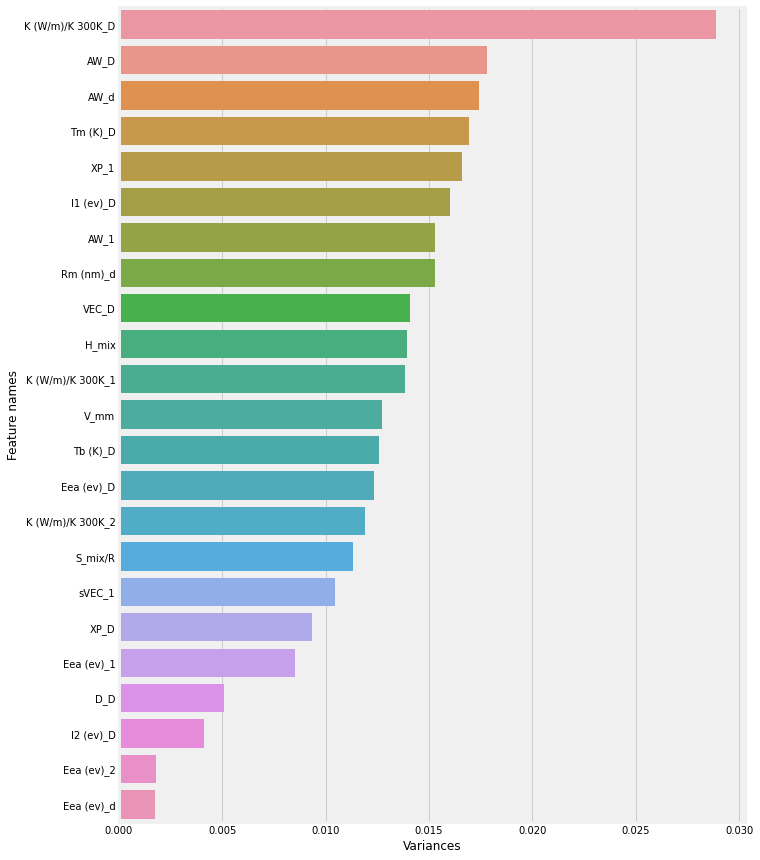

----------------------------------------------------------------------------------------------------


OrderedSet(['Eea (ev)_D', 'I1 (ev)_D', 'Tm (K)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_d', 'VEC_D', 'sVEC_1', 'XP_1', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'S_mix/R', 'V_mm'])

----------------------------------------------------------------------------------------------------
Number of features selected: 17


In [ ]:
# Create variance threshold model instance
variance_threshold_model = VarianceThreshold(threshold=0.01)

# Fit model on train data
fitted_variance_threshold_model = variance_threshold_model.fit(X_train[selected_feature_subsets_dict['Correlation']])

# Initiate dataframe to store variance threshold results
variance_threshold_results_df = pd.DataFrame()

# Get feature names
variance_threshold_results_df['Feature names'] = X_train[selected_feature_subsets_dict['Correlation']].columns
variance_threshold_results_df['Variances'] = fitted_variance_threshold_model.variances_

# Sort according to variance values
variance_threshold_results_df.sort_values(by='Variances', ascending=False, inplace=True, ignore_index=True)

# Display
print(variance_threshold_results_df.to_string())
print('--'*50)

# Plot
plt.figure(figsize=(10,15))
sns.barplot(data=variance_threshold_results_df, x='Variances', y='Feature names')
plt.show()
print('--'*50)

# Get features selected based on variance threshold
selected_features_indices_boolean_list = fitted_variance_threshold_model.get_support()
selected_feature_subsets_dict['Variance threshold'] = OrderedSet(X_train[selected_feature_subsets_dict['Correlation']].columns[selected_features_indices_boolean_list])

# Display selected features set
display(selected_feature_subsets_dict['Variance threshold'])
print('--'*50)
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

### Based on mutual information

Useful resources
1. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

            Features  Mutual info
0               V_mm     1.507049
1               XP_1     1.470740
2          I1 (ev)_D     1.207883
3           Tm (K)_D     1.085352
4               AW_1     1.034827
5   K (W/m)/K 300K_2     1.014569
6               AW_D     0.986818
7               AW_d     0.966878
8              VEC_D     0.965604
9           Tb (K)_D     0.961734
10              XP_D     0.906900
11        Eea (ev)_2     0.867854
12  K (W/m)/K 300K_D     0.867282
13         I2 (ev)_D     0.847713
14               D_D     0.833439
15        Eea (ev)_1     0.826495
16        Eea (ev)_D     0.819522
17         Rm (nm)_d     0.772201
18             H_mix     0.747875
19        Eea (ev)_d     0.725335
20  K (W/m)/K 300K_1     0.719583
21            sVEC_1     0.713561
22           S_mix/R     0.278689


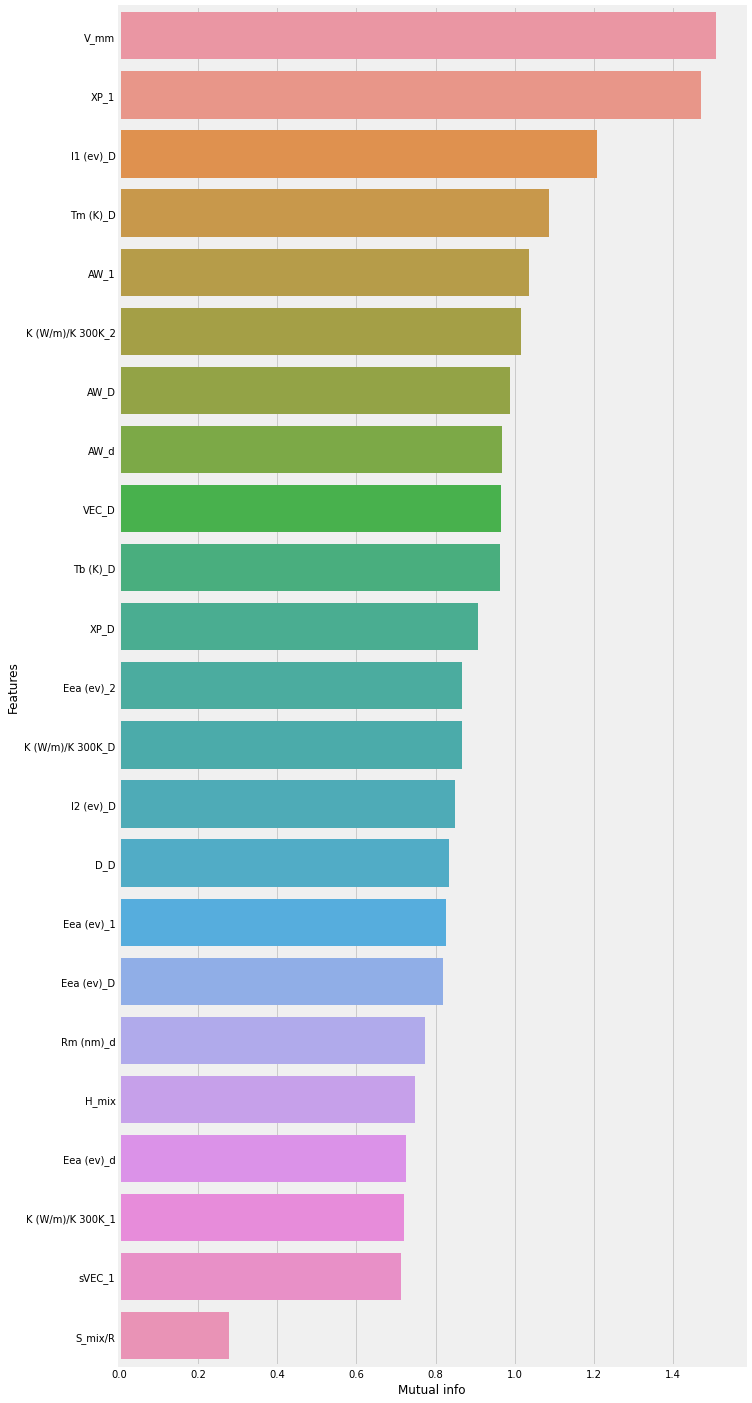

In [ ]:
mutual_info_df = pd.DataFrame()

mutual_info_df['Features'] = X_train[selected_feature_subsets_dict['Correlation']].columns
mutual_info_df['Mutual info'] = mutual_info_regression(X_train[selected_feature_subsets_dict['Correlation']], y_train)

mutual_info_df.sort_values(by='Mutual info', ascending=False, ignore_index=True, inplace=True)

# Display
print(mutual_info_df.to_string())

# Plot
plt.figure(figsize=(10,25))
sns.barplot(data=mutual_info_df, y='Features', x='Mutual info')

In [ ]:
# Set mutual information threshold
minimum_allowed_mutual_info = mutual_info_df['Mutual info'].mean()

# Get the set of features selected on the basis of mutual gain
selected_feature_subsets_dict['Mutual info'] = OrderedSet(mutual_info_df.loc[mutual_info_df['Mutual info'] >= minimum_allowed_mutual_info , 'Features'])

# Display
display(selected_feature_subsets_dict['Mutual info'])
print('--'*50)
print(f"Number of features in the set: {len(selected_feature_subsets_dict['Mutual info'])}")

OrderedSet(['V_mm', 'XP_1', 'I1 (ev)_D', 'Tm (K)_D', 'AW_1', 'K (W/m)/K 300K_2', 'AW_D', 'AW_d', 'VEC_D', 'Tb (K)_D'])

----------------------------------------------------------------------------------------------------
Number of features in the set: 10


### Show features selected so far (based on filter methods)

In [ ]:
selected_feature_subsets_dict

OrderedDict([('All',
              OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mi

## Models selection


In [ ]:
models_dict = {
    # 'Random Forest': Pipeline([('Min max scaler', MinMaxScaler(feature_range=(0.2, 0.8))),
    #                           ('Random forest Regressor', RandomForestRegressor(n_jobs=1, random_state=7))]),
    'Random Forest': RandomForestRegressor(n_jobs=1, random_state=7),
    'Logistic': LogisticRegression(n_jobs=-1),
    'K-Neighbors': KNeighborsRegressor(n_jobs=-1),
    'Support Vector (rbf)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=7),
    'Gradient Boosting': GradientBoostingRegressor(random_state=7),
    'Ada Boost': AdaBoostRegressor(random_state=7),
    'Extreme Gradient Boosting': XGBRegressor(random_state=7),
    'Light Gradient Boosting Machine': LGBMRegressor(random_state=7),
    'Cat boost': CatBoostRegressor(random_state=7)
}


# Initiate results dataframe
models_comparison_results_dict = {}

for model_name, model in models_dict.items():
    # Display current model
    print(f'Trying {model_name}: ')

    # Get cross validation score
    r2_cross_validation_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', 
                                                                cv=10, 
                                                                n_jobs=-1, verbose=100)

    # Display
    print(f'{r2_cross_validation_score.mean():.3f}')

    models_comparison_results_dict.setdefault('Regressor model', []).append(model_name)
    models_comparison_results_dict.setdefault('Mean R-squared score', []).append(r2_cross_validation_score.mean())
    models_comparison_results_dict.setdefault('Std R-squared score', []).append(r2_cross_validation_score.std())

# Convert results to dataframe
models_comparison_results_df = pd.DataFrame.from_dict(models_comparison_results_dict)    

# Sort based on R-squared score 
models_comparison_results_df.sort_values(by='Mean R-squared score', ascending=False, inplace=True, ignore_index=True)

# Display
display(models_comparison_results_df)

# Save results
save_path = '/content/drive/MyDrive/DDP/Stored data/SM/models_comparison_results_df.csv'
models_comparison_results_df.to_csv(save_path)

Trying Random Forest: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    6.3s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished
0.965
Trying Logistic: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0141s.) Setting bat

,Regressor model,Mean R-squared score,Std R-squared score
0,Cat boost,0.979201,0.010292
1,Light Gradient Boosting Machine,0.973440,0.008112
2,Gradient Boosting,0.972993,0.017816
3,Decision Tree,0.972077,0.014443
4,Extreme Gradient Boosting,0.969098,0.034240
5,Ada Boost,0.968529,0.025416
6,Random Forest,0.965419,0.012586
7,K-Neighbors,0.960381,0.023679
8,Support Vector (rbf),0.735948,0.090473
9,Logistic,NaN,NaN


,Regressor model,Mean R-squared score,Std R-squared score
1,Cat boost,0.979201,0.010292
2,Light Gradient Boosting Machine,0.973440,0.008112
3,Gradient Boosting,0.972993,0.017816
4,Decision Tree,0.972077,0.014443
5,Extreme Gradient Boosting,0.969098,0.034240
6,Ada Boost,0.968529,0.025416
7,Random Forest,0.965419,0.012586
8,K-Neighbors,0.960381,0.023679
9,Support Vector (rbf),0.735948,0.090473
10,Logistic,NaN,NaN


(0.95, 0.98)

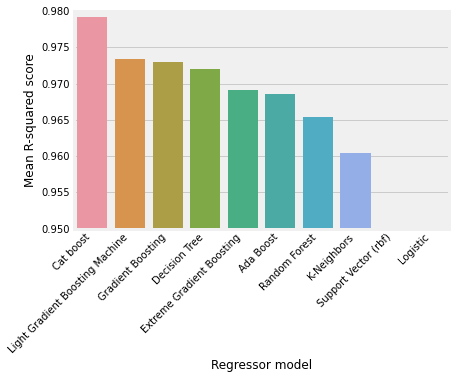

In [ ]:
# Load model comparison results
saved_path = '/content/drive/MyDrive/DDP/Stored data/SM/models_comparison_results_df.csv'
models_comparison_results_df = pd.read_csv(saved_path, index_col=0)

# Set indices to start from 1
models_comparison_results_df.index += 1

# Display
display(models_comparison_results_df)

# Plot
sns.barplot(data=models_comparison_results_df, x='Regressor model', y='Mean R-squared score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.95, 0.98)

## Catboost Regressor


### Initial features CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['All']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['All']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['All'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 94


In [ ]:
# Create validation model instance
fitted_initial_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=10, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_initial_CV_model_dict.joblib'
dump(fitted_initial_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.7min finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_initial_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_initial_CV_model_dict.joblib'
fitted_initial_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_initial_CV_model_df = pd.DataFrame.from_dict(fitted_initial_CV_model_dict)

# Display
fitted_initial_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,43.522339,0.012370,<catboost.core.CatBoostRegressor object at 0x7...,0.990607,0.999839
1,43.514476,0.011430,<catboost.core.CatBoostRegressor object at 0x7...,0.979897,0.999867
2,44.139396,0.010047,<catboost.core.CatBoostRegressor object at 0x7...,0.953573,0.999863
3,44.551502,0.008862,<catboost.core.CatBoostRegressor object at 0x7...,0.991038,0.999880
4,43.645918,0.023162,<catboost.core.CatBoostRegressor object at 0x7...,0.988591,0.999836
5,43.204543,0.012586,<catboost.core.CatBoostRegressor object at 0x7...,0.979854,0.999867
6,43.262408,0.008573,<catboost.core.CatBoostRegressor object at 0x7...,0.975636,0.999900
7,42.844002,0.008624,<catboost.core.CatBoostRegressor object at 0x7...,0.976353,0.999882
8,44.087749,0.009207,<catboost.core.CatBoostRegressor object at 0x7...,0.975033,0.999869
9,43.849145,0.005778,<catboost.core.CatBoostRegressor object at 0x7...,0.981427,0.999847


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_initial_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_initial_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9792008980273575
Std R-squared cross validation score: 0.0102920626122728


### CT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Correlation']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Correlation']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Correlation'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 23


In [ ]:
# Create validation model instance
fitted_CT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_CT_CV_model_dict.joblib'
dump(fitted_CT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   54.6s remaining:   13.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.1min finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_CT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_CT_CV_model_dict.joblib'
fitted_CT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_CT_CV_model_df = pd.DataFrame.from_dict(fitted_CT_CV_model_dict)

# Display
fitted_CT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,13.092917,0.006398,<catboost.core.CatBoostRegressor object at 0x7...,0.973050,0.999790
1,13.226996,0.006248,<catboost.core.CatBoostRegressor object at 0x7...,0.963503,0.999822
2,12.500169,0.006093,<catboost.core.CatBoostRegressor object at 0x7...,0.956657,0.999814
3,12.594831,0.006191,<catboost.core.CatBoostRegressor object at 0x7...,0.992647,0.999836
4,13.115138,0.006224,<catboost.core.CatBoostRegressor object at 0x7...,0.989545,0.999784
5,13.181085,0.006288,<catboost.core.CatBoostRegressor object at 0x7...,0.978016,0.999837
6,13.206602,0.006211,<catboost.core.CatBoostRegressor object at 0x7...,0.978460,0.999838
7,13.463408,0.006194,<catboost.core.CatBoostRegressor object at 0x7...,0.979033,0.999843
8,12.978114,0.006186,<catboost.core.CatBoostRegressor object at 0x7...,0.954130,0.999833
9,12.767902,0.002912,<catboost.core.CatBoostRegressor object at 0x7...,0.965793,0.999784


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_CT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_CT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9730833773277359
Std R-squared cross validation score: 0.012980222921321028


### VT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 17


In [ ]:
# Create validation model instance
fitted_VT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_CV_model_dict.joblib'
dump(fitted_VT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   38.7s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   48.8s finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_CV_model_dict.joblib'
fitted_VT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_CV_model_df = pd.DataFrame.from_dict(fitted_VT_CV_model_dict)

# Display
fitted_VT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,8.898209,0.006194,<catboost.core.CatBoostRegressor object at 0x7...,0.970004,0.999737
1,9.365928,0.006299,<catboost.core.CatBoostRegressor object at 0x7...,0.953487,0.999827
2,10.074897,0.006184,<catboost.core.CatBoostRegressor object at 0x7...,0.969334,0.999741
3,9.925186,0.006064,<catboost.core.CatBoostRegressor object at 0x7...,0.989259,0.999766
4,9.662296,0.006456,<catboost.core.CatBoostRegressor object at 0x7...,0.983005,0.999687
5,9.529348,0.006104,<catboost.core.CatBoostRegressor object at 0x7...,0.975478,0.999747
6,9.620317,0.006251,<catboost.core.CatBoostRegressor object at 0x7...,0.973700,0.999813
7,9.726385,0.006168,<catboost.core.CatBoostRegressor object at 0x7...,0.974367,0.999849
8,10.338962,0.006241,<catboost.core.CatBoostRegressor object at 0x7...,0.953249,0.999740
9,10.153712,0.002491,<catboost.core.CatBoostRegressor object at 0x7...,0.962547,0.999736


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_VT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_VT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9704429337925689
Std R-squared cross validation score: 0.011595613268153023


### MIT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Mutual info'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 10


In [ ]:
# Create validation model instance
fitted_MIT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_CV_model_dict.joblib'
dump(fitted_MIT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   27.8s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.6s finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_CV_model_dict.joblib'
fitted_MIT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_CV_model_dict)

# Display
fitted_MIT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,7.028606,0.012054,<catboost.core.CatBoostRegressor object at 0x7...,0.939343,0.999458
1,7.356987,0.006160,<catboost.core.CatBoostRegressor object at 0x7...,0.967069,0.999540
2,6.605994,0.013516,<catboost.core.CatBoostRegressor object at 0x7...,0.973037,0.999575
3,6.441322,0.006110,<catboost.core.CatBoostRegressor object at 0x7...,0.987899,0.999489
4,6.786927,0.006138,<catboost.core.CatBoostRegressor object at 0x7...,0.983155,0.999464
5,7.285271,0.021383,<catboost.core.CatBoostRegressor object at 0x7...,0.979204,0.999510
6,6.869421,0.006131,<catboost.core.CatBoostRegressor object at 0x7...,0.978618,0.999630
7,6.616162,0.006039,<catboost.core.CatBoostRegressor object at 0x7...,0.982309,0.999492
8,6.920956,0.006208,<catboost.core.CatBoostRegressor object at 0x7...,0.941368,0.999608
9,6.800576,0.002180,<catboost.core.CatBoostRegressor object at 0x7...,0.974494,0.999510


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_MIT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_MIT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9706495726911072
Std R-squared cross validation score: 0.01698820092045351


### VT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Variance threshold"])}')
print(selected_feature_subsets_dict['Variance threshold'])

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features seelcted: 17
OrderedSet(['Eea (ev)_D', 'I1 (ev)_D', 'Tm (K)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_d', 'VEC_D', 'sVEC_1', 'XP_1', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'S_mix/R', 'V_mm'])


In [ ]:
# Create RFECV model instance
RFECV_CBR_model = RFECV(estimator=CBR_estimator_model, cv=10, scoring='r2', verbose=100)

# Fit model on train data
fitted_RFECV_CBR_model = RFECV_CBR_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CBR_model.joblib'
dump(fitted_RFECV_CBR_model, save_path)

Streaming output truncated to the last 5000 lines.
6:	learn: 16.7388198	total: 34.1ms	remaining: 4.84s
7:	learn: 16.3629668	total: 37.6ms	remaining: 4.67s
8:	learn: 16.0006498	total: 41.1ms	remaining: 4.52s
9:	learn: 15.6703032	total: 44.5ms	remaining: 4.4s
10:	learn: 15.3236496	total: 48.2ms	remaining: 4.33s
11:	learn: 15.0046729	total: 51.7ms	remaining: 4.25s
12:	learn: 14.6800278	total: 55.1ms	remaining: 4.18s
13:	learn: 14.3723921	total: 58.6ms	remaining: 4.13s
14:	learn: 14.0593465	total: 62.1ms	remaining: 4.08s
15:	learn: 13.7609614	total: 65.5ms	remaining: 4.03s
16:	learn: 13.4603329	total: 68.9ms	remaining: 3.98s
17:	learn: 13.1795073	total: 72.2ms	remaining: 3.94s
18:	learn: 12.9117989	total: 75.7ms	remaining: 3.91s
19:	learn: 12.6624411	total: 79.1ms	remaining: 3.87s
20:	learn: 12.3821359	total: 82.6ms	remaining: 3.85s
21:	learn: 12.0971957	total: 86.3ms	remaining: 3.83s
22:	learn: 11.8580770	total: 88.7ms	remaining: 3.77s
23:	learn: 11.6350120	total: 92.1ms	remaining: 3.75s


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CBR_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CBR_model.joblib'
fitted_RFECV_CBR_model = load(saved_path)

OrderedSet(['Eea (ev)_D', 'Tm (K)_D', 'Rm (nm)_d', 'VEC_D', 'sVEC_1', 'XP_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'V_mm'])

Number of features selected: 11
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,Eea (ev)_D,I1 (ev)_D,Tm (K)_D,AW_1,AW_D,AW_d,Rm (nm)_d,VEC_D,sVEC_1,XP_1,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,Tb (K)_D,H_mix,S_mix/R,V_mm
211,0.518672,0.590130,0.456081,0.334195,0.384960,0.459984,0.504353,0.582754,0.744444,0.419330,0.382022,0.211723,0.616854,0.548001,0.348549,0.623528,0.360044
102,0.337297,0.457611,0.464936,0.517236,0.652275,0.567147,0.303698,0.440648,0.800000,0.387169,0.276777,0.216656,0.456066,0.508855,0.362837,0.596555,0.379465
95,0.244370,0.465599,0.426423,0.498625,0.626402,0.561058,0.531165,0.449077,0.800000,0.373547,0.267618,0.220213,0.457289,0.284997,0.409100,0.612988,0.478470
183,0.533113,0.624347,0.437224,0.336371,0.411882,0.496026,0.559858,0.511235,0.725926,0.408574,0.343243,0.211980,0.580482,0.562799,0.461078,0.612647,0.347943
74,0.733121,0.412035,0.354041,0.240086,0.391176,0.629668,0.410868,0.740883,0.685185,0.387050,0.571874,0.204357,0.599160,0.516986,0.753429,0.454239,0.415635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.559202,0.632896,0.413790,0.304747,0.394788,0.514593,0.569896,0.561919,0.753704,0.425574,0.341422,0.213005,0.588357,0.520719,0.373721,0.682014,0.340722
67,0.644595,0.357603,0.377350,0.210587,0.316610,0.539922,0.402370,0.706506,0.703704,0.373926,0.546499,0.204102,0.571487,0.519814,0.764583,0.389349,0.432360
25,0.344106,0.537717,0.273596,0.579601,0.487646,0.373001,0.568102,0.595462,0.725926,0.310478,0.334693,0.230401,0.690646,0.328869,0.555111,0.591073,0.559544
199,0.462446,0.379713,0.430383,0.363151,0.237218,0.230691,0.391473,0.626367,0.577778,0.506789,0.653413,0.208535,0.783182,0.506692,0.608705,0.416791,0.331698


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,Eea (ev)_D,Tm (K)_D,Rm (nm)_d,VEC_D,sVEC_1,XP_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,Tb (K)_D,H_mix,V_mm
211,0.518672,0.456081,0.504353,0.582754,0.744444,0.419330,0.211723,0.616854,0.548001,0.348549,0.360044
102,0.337297,0.464936,0.303698,0.440648,0.800000,0.387169,0.216656,0.456066,0.508855,0.362837,0.379465
95,0.244370,0.426423,0.531165,0.449077,0.800000,0.373547,0.220213,0.457289,0.284997,0.409100,0.478470
183,0.533113,0.437224,0.559858,0.511235,0.725926,0.408574,0.211980,0.580482,0.562799,0.461078,0.347943
74,0.733121,0.354041,0.410868,0.740883,0.685185,0.387050,0.204357,0.599160,0.516986,0.753429,0.415635
...,...,...,...,...,...,...,...,...,...,...,...
214,0.559202,0.413790,0.569896,0.561919,0.753704,0.425574,0.213005,0.588357,0.520719,0.373721,0.340722
67,0.644595,0.377350,0.402370,0.706506,0.703704,0.373926,0.204102,0.571487,0.519814,0.764583,0.432360
25,0.344106,0.273596,0.568102,0.595462,0.725926,0.310478,0.230401,0.690646,0.328869,0.555111,0.559544
199,0.462446,0.430383,0.391473,0.626367,0.577778,0.506789,0.208535,0.783182,0.506692,0.608705,0.331698


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring:     11
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Features,Feature importances
0,Eea (ev)_D,3.341449
1,Tm (K)_D,3.641924
3,VEC_D,4.684231
9,H_mix,4.704645
6,K (W/m)/K 300K_2,4.793584
4,sVEC_1,4.875048
2,Rm (nm)_d,5.430087
8,Tb (K)_D,6.915424
5,XP_1,10.811122
7,K (W/m)/K 300K_D,12.591220


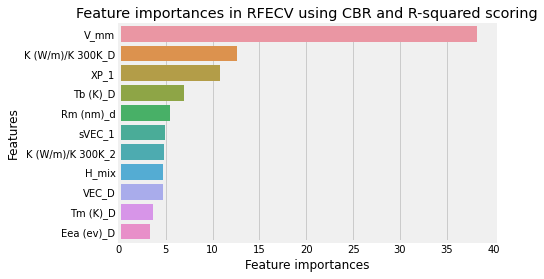

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0     0.840514
1     0.913515
2     0.948091
3     0.965985
4     0.969350
5     0.971403
6     0.975119
7     0.976645
8     0.973628
9     0.976221
10    0.977926
11    0.974996
12    0.975006
13    0.973064
14    0.974664
15    0.971857
16    0.970443
dtype: float64

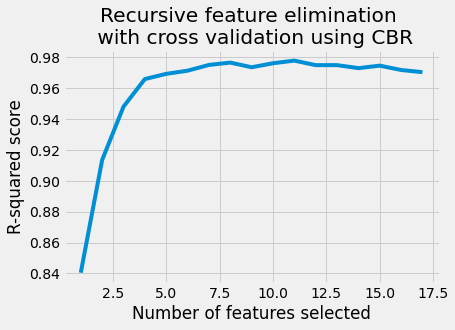

In [ ]:
# Get selected  features list
RFECV_selected_features_list = selected_X_train.loc[:, fitted_RFECV_CBR_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['VT-RFECV'] = OrderedSet(RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['VT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_RFECV_CBR_X_train_df = pd.DataFrame(fitted_RFECV_CBR_model.transform(selected_X_train), columns=RFECV_selected_features_list,
                                            index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_RFECV_CBR_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring: \
    {fitted_RFECV_CBR_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_RFECV_CBR_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)

# Display 
display(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False))


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using CBR and R-squared scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=np.arange(min_features_to_select, n_grid_scores*step + min_features_to_select, step, dtype=int), 
         y=fitted_RFECV_CBR_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using CBR')
plt.xlabel('Number of features selected')
plt.ylabel('R-squared score')

# Display CV grid scores
display(pd.Series(fitted_RFECV_CBR_model.grid_scores_))

In [ ]:
np.arange(min_features_to_select, n_grid_scores*step + min_features_to_select, step)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
fitted_RFECV_CBR_model.grid_scores_

array([0.84051403, 0.91351508, 0.94809116, 0.96598466, 0.96935033,
       0.97140285, 0.97511902, 0.97664464, 0.97362826, 0.97622143,
       0.97792569, 0.97499574, 0.97500598, 0.97306373, 0.97466403,
       0.97185749, 0.97044293])

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 11


In [ ]:
# Create validation model instance
fitted_VT_RFECV_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CV_model_dict.joblib'
dump(fitted_VT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   32.3s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.2s finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_VT_RFECV_CV_model_dict.joblib'
fitted_VT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_VT_RFECV_CV_model_dict)

# Display
fitted_VT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,7.391121,0.006327,<catboost.core.CatBoostRegressor object at 0x7...,0.978120,0.999541
1,7.464578,0.015158,<catboost.core.CatBoostRegressor object at 0x7...,0.968153,0.999670
2,7.962333,0.006226,<catboost.core.CatBoostRegressor object at 0x7...,0.975911,0.999536
3,7.691988,0.006222,<catboost.core.CatBoostRegressor object at 0x7...,0.989025,0.999647
4,7.354109,0.006073,<catboost.core.CatBoostRegressor object at 0x7...,0.986671,0.999516
5,6.373374,0.006148,<catboost.core.CatBoostRegressor object at 0x7...,0.971494,0.999620
6,7.620538,0.006425,<catboost.core.CatBoostRegressor object at 0x7...,0.969209,0.999670
7,7.598499,0.006101,<catboost.core.CatBoostRegressor object at 0x7...,0.981767,0.999630
8,7.315413,0.006094,<catboost.core.CatBoostRegressor object at 0x7...,0.964683,0.999660
9,6.897327,0.002254,<catboost.core.CatBoostRegressor object at 0x7...,0.976138,0.999564


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9761171324748172
Std R-squared cross validation score: 0.007597519233501673


#### Final model

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")

# Create CBR estimator model instance
final_CBR_estimator_model = fitted_VT_RFECV_CV_model_dict['estimator'][3]

Number of features selected: 11


,Measured G (GPa),Predicted G (GPa)
0,73.00,73.192453
1,43.70,39.736832
2,79.20,81.396862
3,37.90,32.860784
4,25.80,27.297302
5,19.90,19.275512
6,19.80,20.082499
7,34.40,33.812889
8,11.70,11.512380
9,75.30,74.370297


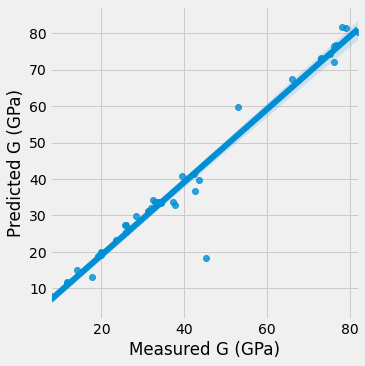

In [ ]:
# Get prediction on test data
y_test_predicted = final_CBR_estimator_model.predict(selected_X_test)

# Create dataframe of the target and predicted test data
y_test_data_df = pd.DataFrame(np.column_stack([y_test, y_test_predicted]), columns=['Measured G (GPa)', 'Predicted G (GPa)'])

# Display
display(y_test_data_df)

# Plot
sns.lmplot(data=y_test_data_df, x='Measured G (GPa)', y='Predicted G (GPa)')

In [ ]:
# Calculate root mean squared error (RMSE)
final_model_RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_test_predicted, 
                                              squared=False) # If True returns MSE value, if False returns RMSE value.

# Display
final_model_RMSE

4.7007878051108145

### MIT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Mutual info"])}')
print(selected_feature_subsets_dict['Mutual info'])

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features seelcted: 10
OrderedSet(['V_mm', 'XP_1', 'I1 (ev)_D', 'Tm (K)_D', 'AW_1', 'K (W/m)/K 300K_2', 'AW_D', 'AW_d', 'VEC_D', 'Tb (K)_D'])


In [ ]:
# Create RFECV model instance
RFECV_CBR_model = RFECV(estimator=CBR_estimator_model, cv=10, scoring='r2', verbose=100)

# Fit model on train data
fitted_RFECV_CBR_model = RFECV_CBR_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CBR_model.joblib'
dump(fitted_RFECV_CBR_model, save_path)

Streaming output truncated to the last 5000 lines.
6:	learn: 16.9555806	total: 4.86ms	remaining: 689ms
7:	learn: 16.6017798	total: 5.33ms	remaining: 661ms
8:	learn: 16.2409040	total: 5.82ms	remaining: 641ms
9:	learn: 15.8918573	total: 6.29ms	remaining: 623ms
10:	learn: 15.5556129	total: 6.77ms	remaining: 609ms
11:	learn: 15.2417872	total: 8.67ms	remaining: 714ms
12:	learn: 14.9399330	total: 9.94ms	remaining: 754ms
13:	learn: 14.6307583	total: 11.9ms	remaining: 835ms
14:	learn: 14.3342050	total: 12.6ms	remaining: 828ms
15:	learn: 14.0466247	total: 13.4ms	remaining: 823ms
16:	learn: 13.7714441	total: 14.1ms	remaining: 814ms
17:	learn: 13.5274229	total: 14.8ms	remaining: 805ms
18:	learn: 13.2374583	total: 15.5ms	remaining: 798ms
19:	learn: 12.9957971	total: 16.2ms	remaining: 792ms
20:	learn: 12.7577402	total: 16.9ms	remaining: 786ms
21:	learn: 12.5313657	total: 17.5ms	remaining: 780ms
22:	learn: 12.2901341	total: 18.2ms	remaining: 774ms
23:	learn: 12.0646115	total: 18.9ms	remaining: 768ms

['/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CBR_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CBR_model.joblib'
fitted_MIT_RFECV_CBR_model = load(saved_path)

OrderedSet(['V_mm', 'XP_1', 'I1 (ev)_D', 'Tm (K)_D', 'AW_1', 'K (W/m)/K 300K_2', 'VEC_D', 'Tb (K)_D'])

Number of features selected: 8
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,V_mm,XP_1,I1 (ev)_D,Tm (K)_D,AW_1,K (W/m)/K 300K_2,AW_D,AW_d,VEC_D,Tb (K)_D
211,0.360044,0.419330,0.590130,0.456081,0.334195,0.211723,0.384960,0.459984,0.582754,0.548001
102,0.379465,0.387169,0.457611,0.464936,0.517236,0.216656,0.652275,0.567147,0.440648,0.508855
95,0.478470,0.373547,0.465599,0.426423,0.498625,0.220213,0.626402,0.561058,0.449077,0.284997
183,0.347943,0.408574,0.624347,0.437224,0.336371,0.211980,0.411882,0.496026,0.511235,0.562799
74,0.415635,0.387050,0.412035,0.354041,0.240086,0.204357,0.391176,0.629668,0.740883,0.516986
...,...,...,...,...,...,...,...,...,...,...
214,0.340722,0.425574,0.632896,0.413790,0.304747,0.213005,0.394788,0.514593,0.561919,0.520719
67,0.432360,0.373926,0.357603,0.377350,0.210587,0.204102,0.316610,0.539922,0.706506,0.519814
25,0.559544,0.310478,0.537717,0.273596,0.579601,0.230401,0.487646,0.373001,0.595462,0.328869
199,0.331698,0.506789,0.379713,0.430383,0.363151,0.208535,0.237218,0.230691,0.626367,0.506692


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,V_mm,XP_1,I1 (ev)_D,Tm (K)_D,AW_1,K (W/m)/K 300K_2,VEC_D,Tb (K)_D
211,0.360044,0.419330,0.590130,0.456081,0.334195,0.211723,0.582754,0.548001
102,0.379465,0.387169,0.457611,0.464936,0.517236,0.216656,0.440648,0.508855
95,0.478470,0.373547,0.465599,0.426423,0.498625,0.220213,0.449077,0.284997
183,0.347943,0.408574,0.624347,0.437224,0.336371,0.211980,0.511235,0.562799
74,0.415635,0.387050,0.412035,0.354041,0.240086,0.204357,0.740883,0.516986
...,...,...,...,...,...,...,...,...
214,0.340722,0.425574,0.632896,0.413790,0.304747,0.213005,0.561919,0.520719
67,0.432360,0.373926,0.357603,0.377350,0.210587,0.204102,0.706506,0.519814
25,0.559544,0.310478,0.537717,0.273596,0.579601,0.230401,0.595462,0.328869
199,0.331698,0.506789,0.379713,0.430383,0.363151,0.208535,0.626367,0.506692


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring:     8
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Features,Feature importances
4,AW_1,6.208744
2,I1 (ev)_D,6.386642
6,VEC_D,7.573302
7,Tb (K)_D,8.245726
3,Tm (K)_D,8.840404
5,K (W/m)/K 300K_2,8.994407
1,XP_1,13.930913
0,V_mm,39.819863


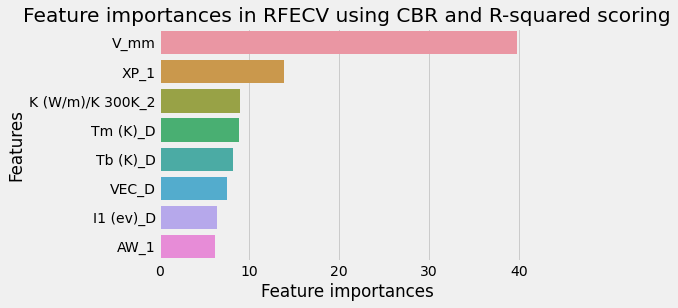

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0    0.840514
1    0.900586
2    0.938655
3    0.964650
4    0.968720
5    0.969740
6    0.968569
7    0.971163
8    0.970492
9    0.970650
dtype: float64

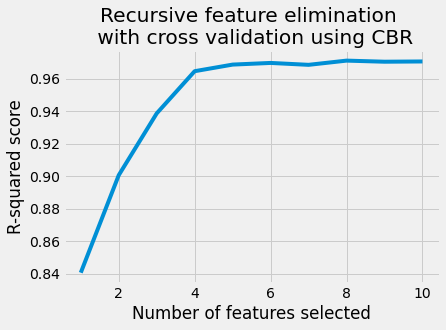

In [ ]:
# Get selected  features list
RFECV_selected_features_list = selected_X_train.loc[:, fitted_MIT_RFECV_CBR_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['MIT-RFECV'] = OrderedSet(RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['MIT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_RFECV_CBR_X_train_df = pd.DataFrame(fitted_MIT_RFECV_CBR_model.transform(selected_X_train), columns=RFECV_selected_features_list,
                                            index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_RFECV_CBR_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring: \
    {fitted_MIT_RFECV_CBR_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_MIT_RFECV_CBR_model.estimator_.feature_importances_


# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)

# Display 
display(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False))


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using CBR and R-squared scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_MIT_RFECV_CBR_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using CBR')
plt.xlabel('Number of features selected')
plt.ylabel('R-squared score')

# Display CV grid scores
display(pd.Series(fitted_MIT_RFECV_CBR_model.grid_scores_))

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 8


In [ ]:
# Create validation model instance
fitted_MIT_RFECV_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CV_model_dict.joblib'
dump(fitted_MIT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   21.5s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   26.6s finished


['/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/SM/fitted_MIT_RFECV_CV_model_dict.joblib'
fitted_MIT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_RFECV_CV_model_dict)

# Display
fitted_MIT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,5.723221,0.006161,<catboost.core.CatBoostRegressor object at 0x7...,0.940106,0.999346
1,5.529316,0.006134,<catboost.core.CatBoostRegressor object at 0x7...,0.981246,0.999409
2,5.410492,0.006110,<catboost.core.CatBoostRegressor object at 0x7...,0.973234,0.999300
3,5.237326,0.016862,<catboost.core.CatBoostRegressor object at 0x7...,0.987699,0.999473
4,5.019491,0.006061,<catboost.core.CatBoostRegressor object at 0x7...,0.985922,0.999221
5,4.194096,0.006194,<catboost.core.CatBoostRegressor object at 0x7...,0.969914,0.999437
6,5.573657,0.006421,<catboost.core.CatBoostRegressor object at 0x7...,0.976744,0.999572
7,5.415289,0.006112,<catboost.core.CatBoostRegressor object at 0x7...,0.976015,0.999456
8,5.338191,0.016619,<catboost.core.CatBoostRegressor object at 0x7...,0.946992,0.999488
9,5.082594,0.002084,<catboost.core.CatBoostRegressor object at 0x7...,0.973763,0.999408


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9711634266121539
Std R-squared cross validation score: 0.01486269031180895


In [ ]:
fitted_MIT_RFECV_CV_model_dict['estimator'][3].predict(X_train)

array([37.86217169, 28.72121758, 26.26338783, 34.96101021, 20.52689014,
       35.05480247, 23.97483863, 36.86533449, 37.37765296, 32.81641614,
       20.83410454, 32.9831451 , 30.52367994, 14.21907031, 28.81951542,
       65.70809105, 34.201526  , 11.4999841 , 30.87050976, 73.51973905,
       91.83268397, 29.68693622, 27.36389152, 44.78795635, 33.53714666,
       16.44583208, 29.05812393, 23.4215693 , 25.88240037, 39.41003985,
       79.12016859, 11.49491625,  8.87358491, 28.85029432, 33.87735794,
       32.86923724, 33.46130188,  8.99238514, 35.28246086, 11.80711173,
       18.20252961, 42.77546129, 18.86272439, 31.88564117, 33.12146526,
       30.98552109, 36.95314095, 27.8917036 , 29.685229  , 87.70999864,
       65.48480448, 23.23450506, 29.25424159, 12.32880516, 65.64118591,
       30.34373494, 36.90907108, 11.54348061, 37.84765904, 10.83058678,
       11.4591187 , 28.97455103, 17.55354431, 79.21988614, 73.23470075,
       26.6515428 , 80.16803103, 59.34231763, 30.14742425, 11.37

In [ ]:
# Predict on test data
y_test_predicted = fitted_MIT_RFECV_CV_model_dict['estimator'][0].predict(X_test[selected_feature_subsets_dict['MIT-RFECV']])

metrics.r2_score(y_test, y_test_predicted)

0.9587328864360436

### Optimization

Useful resources:
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74